# Sprint 04 Tasca 02

## Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

 Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv('movies.dat', encoding='latin1', header=None, sep='::', index_col=0)
df.columns=['Nom', 'Genere']
#Separem el camp Any del camp Nom amb 'regular expressions'
df[['Nom', 'Any']]=df['Nom'].str.extract('(.*?)\s\((\d+)\)')
#Com les instruccions diuen que cada pel·lícula només pot tenir un gènere, asumirem que el primer gènere era el més important i ens
#quedarem amb aquest
df['Genere']=df['Genere'].str.extract('^(\w+)')
df.head(10)

C:\Users\mabi1\AppData\Local\Temp\ipykernel_28136\1399138793.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('movies.dat', encoding='latin1', header=None, sep='::', index_col=0)


,Nom,Genere,Any
0,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


In [75]:
#Comprovem si hi ha NaN
df.isna().sum()

Nom       1
Genere    0
Any       1
dtype: int64

In [76]:
#Com que només hi ha un registre vuit de més de 3800, i no tenim 'Nom' ni 'Any' el més adient és eliminar-lo i treballar amb els demés
df=df[df['Nom'].notna()]
df.isna().sum()

Nom       0
Genere    0
Any       0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nom     3882 non-null   object
 1   Genere  3882 non-null   object
 2   Any     3882 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


In [78]:
df.describe()

,Nom,Genere,Any
count,3882,3882,3882
unique,3840,18,81
top,Hamlet,Drama,1996
freq,5,1176,345


## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [79]:
df['Decada']=df['Any'].astype('int32') // 10 * 10

In [80]:
#Farem un nou dataframe amb la quantitat de pel·lícules agrupades per decada i genere
df_grouped=df.groupby(['Decada', 'Genere'])['Nom'].count().reset_index().rename(columns={'Nom': 'Quantitat'})
df_grouped

,Decada,Genere,Quantitat
0,1910,Action,1
1,1910,Adventure,1
2,1910,Comedy,1
3,1920,Action,1
4,1920,Adventure,1
...,...,...,...
131,2000,Drama,36
132,2000,Horror,4
133,2000,Romance,1
134,2000,Sci,2


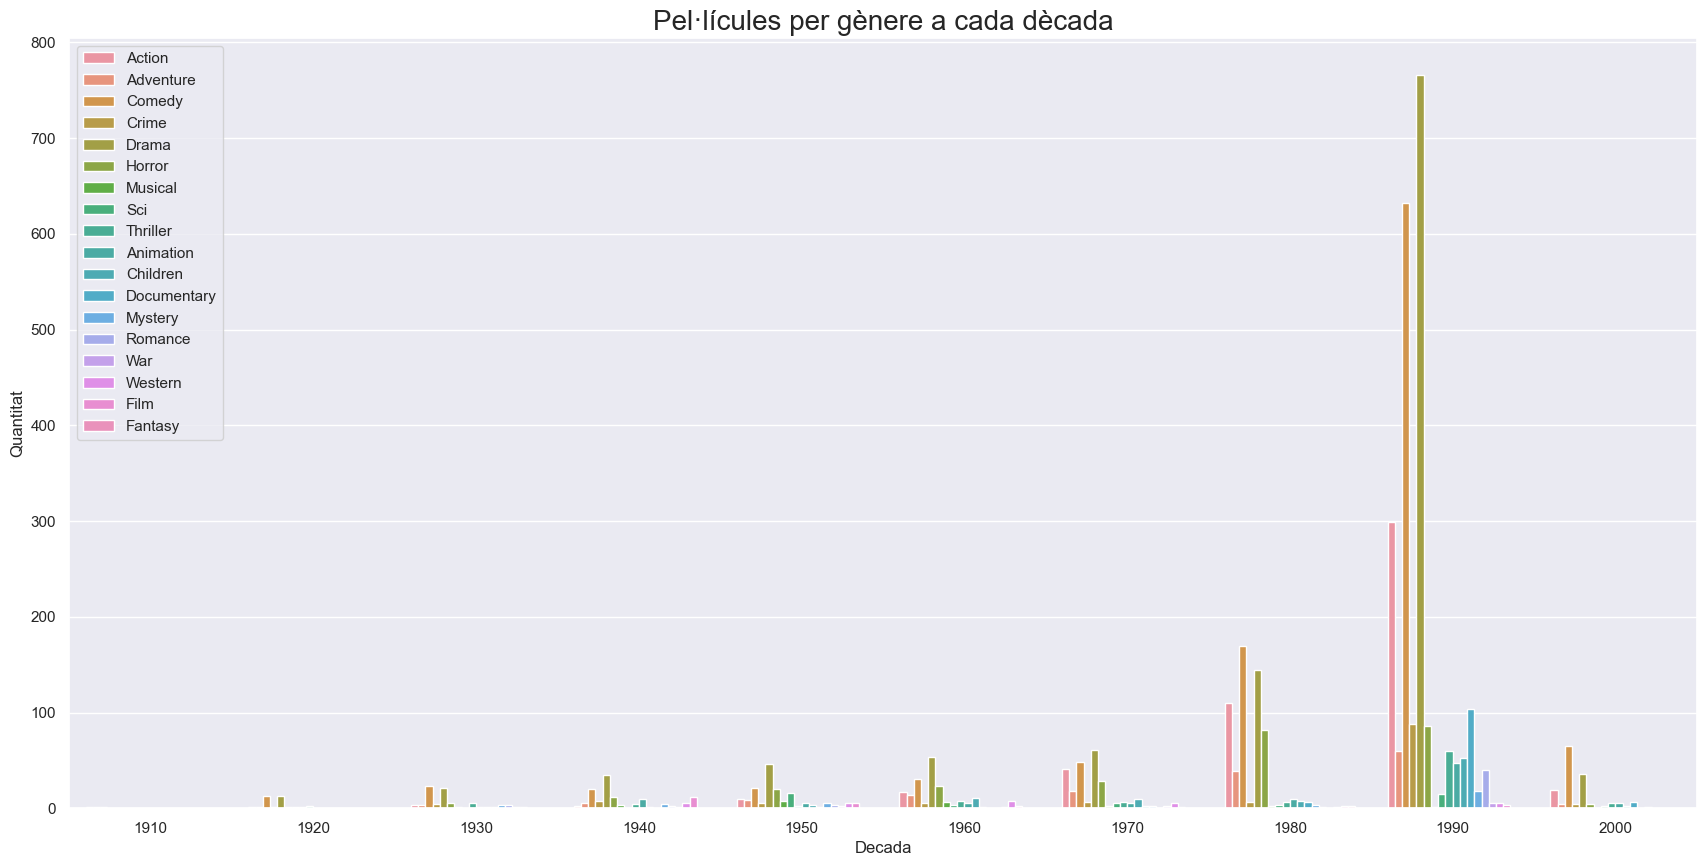

In [81]:
sns.set(rc={'figure.figsize':(21,10)})
ax = sns.barplot(x='Decada', y='Quantitat', hue='Genere', data=df_grouped)
ax.legend(loc='upper left')
plt.title('Pel·lícules per gènere a cada dècada', size=20)
plt.show()

La idea de veure quins generes eren més populars per a cada època semblava bona, però la quantitat de pel·lícules a la dècada dels 90 fa que no sigui massa llegible. Farem zoom als anys 90 que és on tenim més dades.

In [82]:
df_grouped=df[(df['Any'] >='1990') & (df['Any']<='1999')].groupby(['Any', 'Genere'])['Nom'].count().reset_index().rename(columns={'Nom': 'Quantitat'})
df_grouped

,Any,Genere,Quantitat
0,1990,Action,19
1,1990,Adventure,2
2,1990,Animation,2
3,1990,Children,1
4,1990,Comedy,15
...,...,...,...
125,1999,Horror,9
126,1999,Mystery,2
127,1999,Romance,3
128,1999,Sci,1


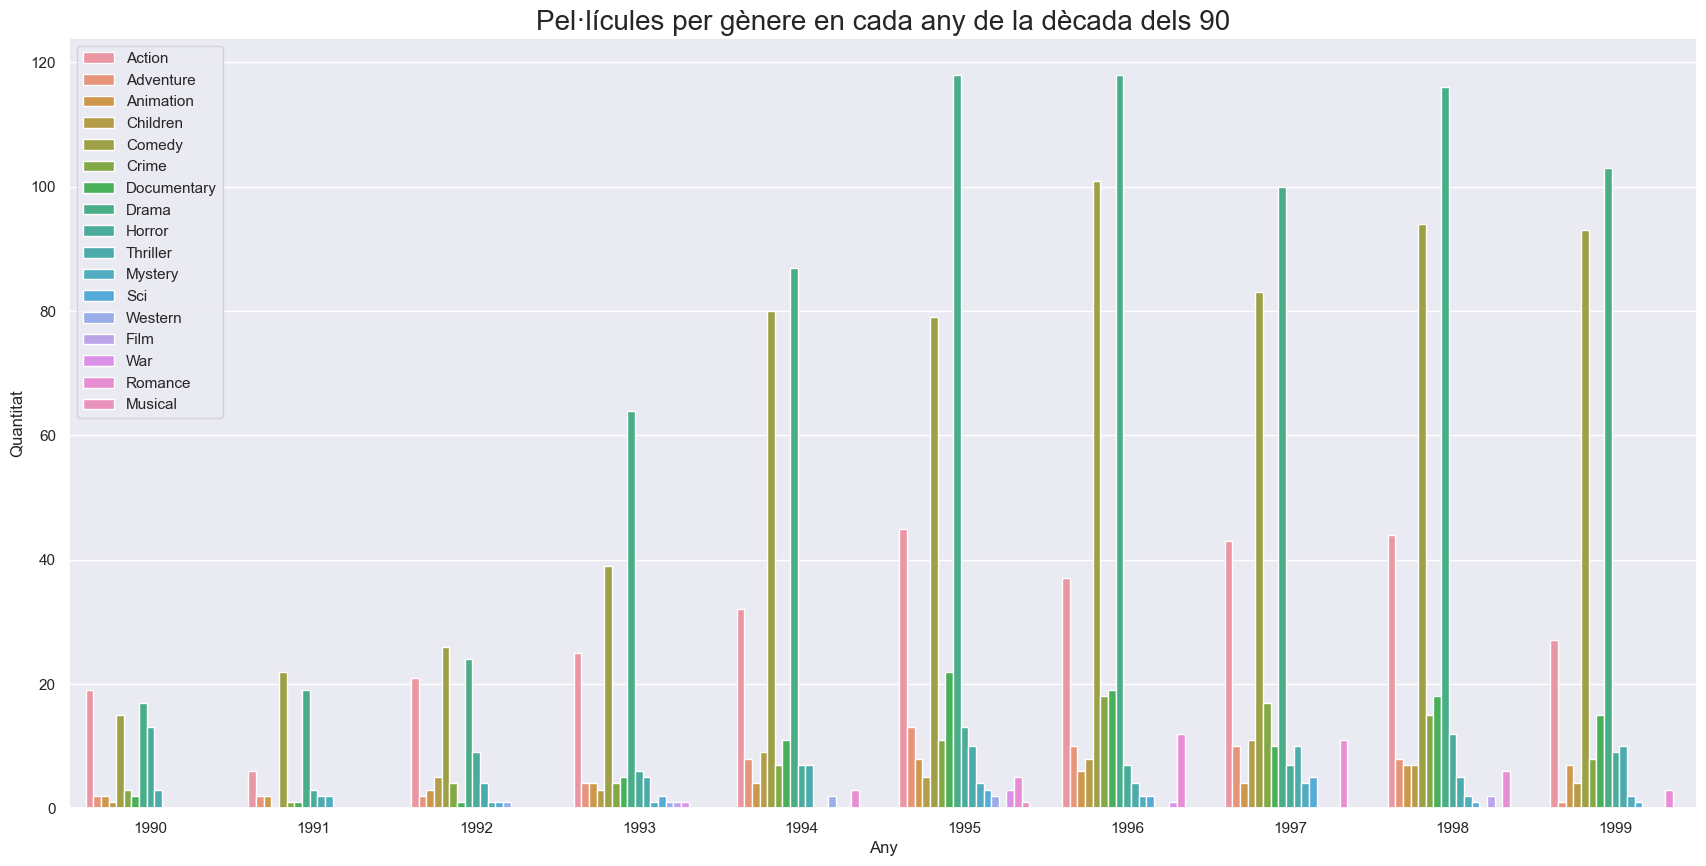

In [83]:
sns.set(rc={'figure.figsize':(21,10)})
ax = sns.barplot(x='Any', y='Quantitat', hue='Genere', data=df_grouped)
ax.legend(loc='upper left')
plt.title('Pel·lícules per gènere en cada any de la dècada dels 90', size=20)
plt.show()

Aquesta gràfica és una mica més clara, pero continua sent confusa amb tanta quantitat de generes i barres tan estretes. Farem una on només consti el gènere que més pel·lícules va tenir aquell any.

In [84]:
df_grouped=df_grouped.iloc[df_grouped.groupby('Any').agg(max_ = ('Quantitat', lambda data: data.idxmax())).max_]

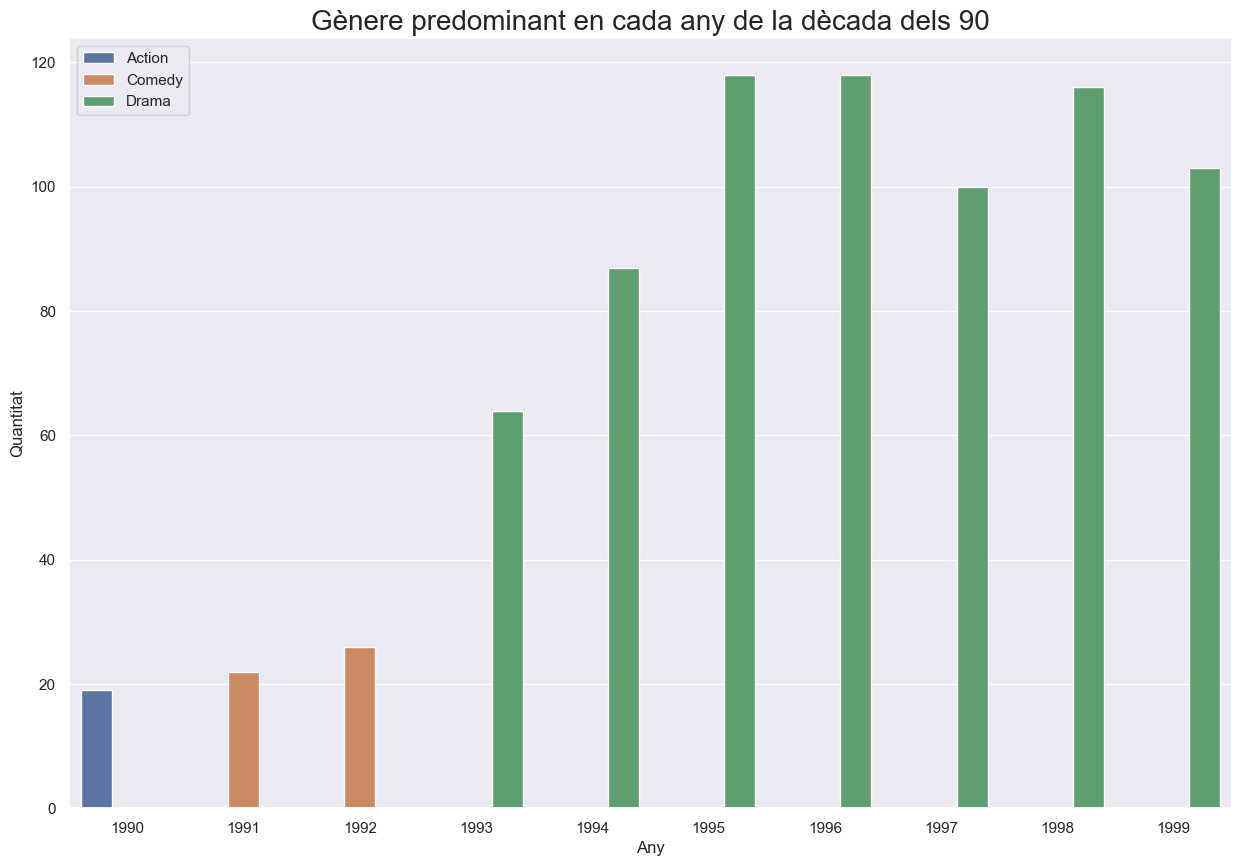

In [86]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Any', y='Quantitat', hue='Genere', data=df_grouped)
ax.legend(loc='upper left')
plt.title('Gènere predominant en cada any de la dècada dels 90', size=20)
plt.show()

Aquí podem veure molt més clarament que a la dècada dels 90 van predominar les películes del gènere drama gairebé tots els anys. Amb un començament de la decada que tenia l'acció i la comèdia com a genere predominant. Com ja podiem entreveure a les gràfiques anteriors, a la segona meitat de la dècada augmenta molt la quantitat de pel·lícules registrades, especiament els anys 1995 i 1996.